In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from random import choice
import random
import networkx as nx

from pandas.io.json import json_normalize

bitcoind -daemon

~/lightning/lightningd/lightningd --network=bitcoin --log-level=debug


~/lightning/cli/lightning-cli listchannels  > /Users/dariuscognac/Documents/GitHub/Lightning-Network-Topological-Analysis/list_of_channels1.json


In [ ]:
!~/lightning/cli/lightning-cli listnodes > /Users/dariuscognac/Documents/GitHub/Lightning-Network-Topological-Analysis/list_of_nodes1.json

In [ ]:
!~/lightning/cli/lightning-cli listchannels  > /Users/dariuscognac/Documents/GitHub/Lightning-Network-Topological-Analysis/list_of_channels1.json

In [2]:
# LOAD AND FORMAT DATA
nodes_temp = pd.read_json('list_of_nodes1.json')
nodes_table = json_normalize(nodes_temp['nodes'])

channels_temp = pd.read_json('list_of_channels1.json')
channels_table = json_normalize(channels_temp['channels'])

# display(nodes_table.head())
# display(channels_table.head())

In [3]:
# MAKE GRAPH
G = nx.Graph()
G.add_nodes_from(nodes_table['nodeid'])
edges_list = [(channels_table['source'][i], channels_table['destination'][i]) for i in range(len(channels_table))]
G.add_edges_from(edges_list)

print('Number of nodes = ' + str(len(G.nodes())))
print('Number of edges (payment channels) = ' + str(len(G.edges())))

Number of nodes = 2602
Number of edges (payment channels) = 8045


In [4]:
def print_subgraphs(G):
    all_sub_G = list(nx.connected_component_subgraphs(G))
    for i, sg in enumerate(all_sub_G):
        print("subgraph {} has {} nodes".format(i, sg.number_of_nodes()))
        

# Get just the main graph
def get_main_subgraph(G):
    
    all_sub_G = list(nx.connected_component_subgraphs(G))
    
    largest_sg = 0
    for i, sg in enumerate(all_sub_G):
        if sg.number_of_nodes() > largest_sg:
            largest_sg = sg.number_of_nodes()
            main_G = sg
        
    return main_G


# TO DO - OPTIMIZE THIS STAGE
def average_node_connectivity_fast(G):
    
    nodes = list(G.nodes())
    iterations = 100
    tot_connectivity = 0
    
    for i in range (iterations):
        rand_node_from = choice(nodes)
        rand_node_to = choice(nodes)
        
        tot_connectivity += nx.algorithms.connectivity.connectivity.local_node_connectivity(G, rand_node_from, rand_node_to)
   
    avg_connectivity = tot_connectivity/iterations
    
    return avg_connectivity


def add_x_nodes_with_perc_centrality(G, num_nodes_to_add, upper_percentile):

    for i in range(num_nodes_to_add):

        # Find nodes within top X% of highest centrality
        potential_neighbors = list(find_nodes_high_percentile_deg_cent(main_G, upper_percentile))
        
        # pick two
        new_neighbors = random.sample(potential_neighbors, 2)

        
        # Add new node and neighbors
        newnode = 'newnodeID' + str(random.randint(1,10**20))
        G.add_node(newnode)
        
        G.add_edges_from([(newnode,new_neighbors[0]), (newnode,new_neighbors[1])])
        
    return G
        


# Define find_nodes_with_highest_deg_cent()
def find_nodes_high_percentile_deg_cent(G, upper_percentile):
    

    # Compute the degree centrality of G: deg_cent      
    deg_cent = nx.degree_centrality(G)

    # Compute the X percentile of degree centrality
    dc = list(deg_cent.values())
    high_percentile_dc = np.percentile(dc, upper_percentile)

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v > high_percentile_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes




In [5]:
print_subgraphs(G)

subgraph 0 has 2552 nodes
subgraph 1 has 2 nodes
subgraph 2 has 2 nodes
subgraph 3 has 3 nodes
subgraph 4 has 2 nodes
subgraph 5 has 2 nodes
subgraph 6 has 3 nodes
subgraph 7 has 2 nodes
subgraph 8 has 2 nodes
subgraph 9 has 2 nodes
subgraph 10 has 2 nodes
subgraph 11 has 2 nodes
subgraph 12 has 2 nodes
subgraph 13 has 2 nodes
subgraph 14 has 2 nodes
subgraph 15 has 2 nodes
subgraph 16 has 2 nodes
subgraph 17 has 2 nodes
subgraph 18 has 2 nodes
subgraph 19 has 2 nodes
subgraph 20 has 2 nodes
subgraph 21 has 2 nodes
subgraph 22 has 2 nodes
subgraph 23 has 2 nodes
subgraph 24 has 2 nodes


In [6]:
main_G = get_main_subgraph(G)
print_subgraphs(main_G)

subgraph 0 has 2552 nodes


In [7]:
connectivity = average_node_connectivity_fast(main_G)
connectivity

1.64

In [8]:
main_G1 = get_main_subgraph(G)
main_G1 = add_x_nodes_with_perc_centrality(main_G1, 500, 99.5)

print(len(main_G1.nodes()))

3052


In [9]:
connectivity = average_node_connectivity_fast(main_G1)
connectivity

1.78

In [10]:
main_G2 = get_main_subgraph(G) # TODO: Need to keep these graphs separate
main_G2 = add_x_nodes_with_perc_centrality(main_G2, 500, 0)
print(len(main_G2.nodes()))

3052


In [11]:
connectivity = average_node_connectivity_fast(main_G2)
connectivity

2.78

In [12]:
main_G = get_main_subgraph(G)

# Find nodes within top X% of highest centrality
potential_neighbors = list(find_nodes_high_percentile_deg_cent(main_G, upper_percentile = 99.99))

# pick two
new_neighbors = random.sample(a, 2)

new_neighbors

NameError: name 'a' is not defined

In [13]:
high_deg_cent = list(find_nodes_high_percentile_deg_cent(main_G, upper_percentile=99))
high_deg_cent

['03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278',
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '03f9ceb115a119594b4688ceed35feb80f33a3dd0f5cf688a7493c1a7217633931',
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0',
 '0303a518845db99994783f606e6629e705cfaf072e5ce9a4d8bf9e249de4fbd019',
 '03da1c27ca77872ac5b3e568af30673e599a47a5e4497f85c7b5da42048807b3ed',
 '0327049d8d63f0c40193cdf3afc61817c8647808a4e482de0716fcef74e6d92ebf',
 '02cb2677db78e50a6d178092bf8c9b1f0e7d4b9a2bed918bc3f276c89c1649ba5b',
 '032679fec1213e5b0a23e066c019d7b991b95c6e4d28806b9ebd1362f9e32775cf',
 '0251b2c9d22f3621f27188d8236db84d9fd84d42adac063b2633744638b81f34ac',
 '028303182c9885da93b3b25c9621d22cf34475e63c123942e402ab530c0556e675',
 '030995c0c0217d763c2274aa6ed69a0bb85fa2f7d118f93631550f3b6219a577f5',
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '03c2

In [14]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(main_G)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(main_G)

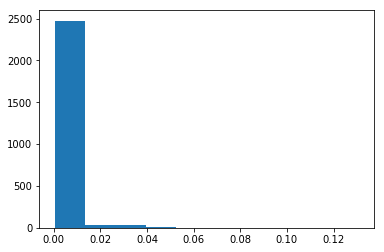

In [15]:
plt.hist(deg_cen.values())
plt.show()

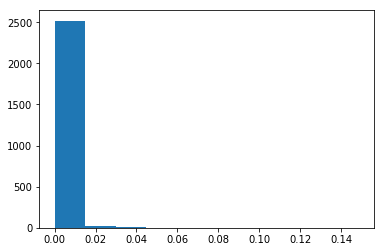

In [16]:
plt.hist(bet_cen.values())
plt.show()

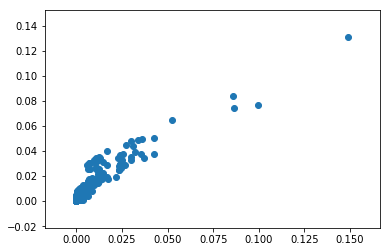

In [17]:
plt.scatter(x = list(bet_cen.values()), y = list(deg_cen.values()));


/Users/dariuscognac/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


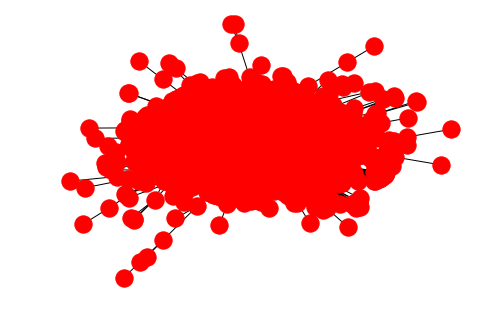

In [18]:
nx.draw(main_G, with_labels=False, font_weight='bold')

In [19]:
from nxviz import CircosPlot
from nxviz import ArcPlot

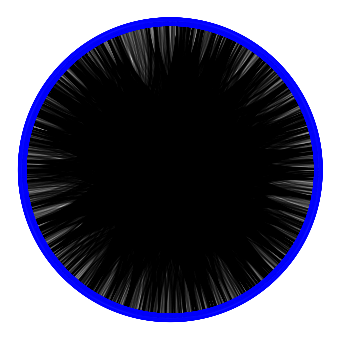

In [20]:
h = CircosPlot(main_G)

# Draw the ArcPlot to the screen
h.draw()
plt.show()


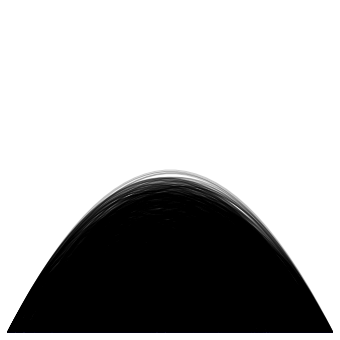

In [21]:
b = ArcPlot(main_G)

# Draw the ArcPlot to the screen
b.draw()
plt.show()

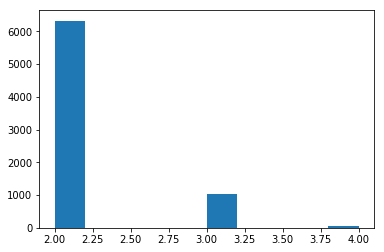

In [22]:
# Clique size distribution
cliques = list(nx.find_cliques(main_G))
cliq_len = [len(cliques[i]) for i in range(len(cliques))]

plt.hist(cliq_len);